###  Created by Luis A. Sanchez-Perez (alejand@umich.edu).
<p><span style="color:green"><b>Copyright &#169;</b> Do not distribute or use without authorization from author.</span></p>

### How the backpropagation algorithm works?
**Backpropagation is equivalent to say 'a smart and efficient way to compute the gradient of the cost function'**

Lets approach this from an MLP perspective. As we will see later, this is simpler to understand and way more scalable if we use a computation graph approach.

### Notation related to a neural network architecture

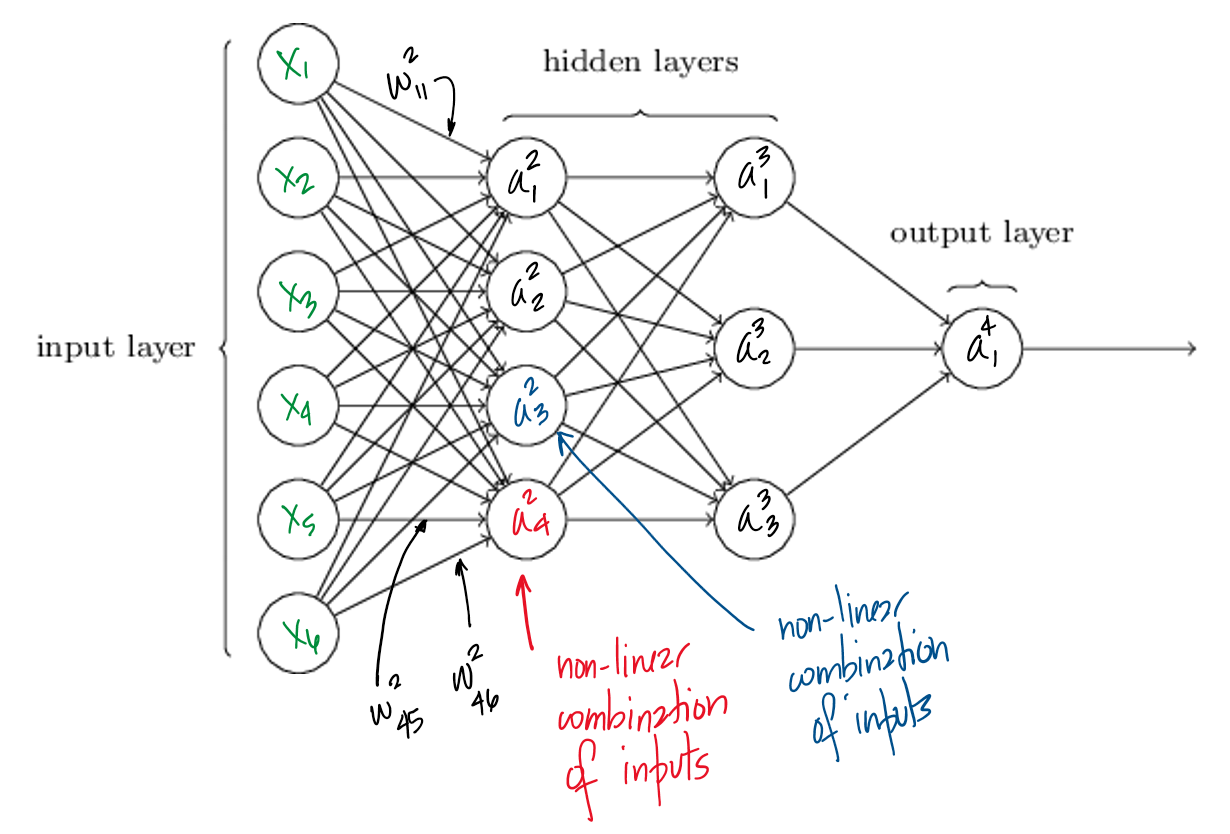</img>

Let's begin with a notation which lets us refer to weights in the network in an unambiguous way. We'll use \\(w^l_{jk}\\) to denote the weight for the connection from the \\(k^{\rm th}\\) neuron in the \\((l-1)^{\rm th}\\) layer to the \\(j^{th}\\) neuron in the lth layer.

We use a similar notation for the network's biases and activations. Explicitly, we use \\(b^l_j\\) for the bias of the \\(j^{\rm th}\\) neuron in the \\(l^{\rm th}\\) layer. And we use \\(a^l_j\\) for the activation of the \\(j^{\rm th}\\) neuron in the \\(l^{\rm th}\\) layer. 

<b>Lets remember some notation related to a neural network architecture:</b>

<img src="attachment:image.png" width="600"></img>

Let's begin with a notation which lets us refer to weights in the network in an unambiguous way. We'll use \\(w^l_{jk}\\) to denote the weight for the connection from the \\(k^{\rm th}\\) neuron in the \\((l-1)^{\rm th}\\) layer to the \\(j^{th}\\) neuron in the lth layer.

We use a similar notation for the network's biases and activations. Explicitly, we use \\(b^l_j\\) for the bias of the \\(j^{\rm th}\\) neuron in the \\(l^{\rm th}\\) layer. And we use \\(a^l_j\\) for the activation of the \\(j^{\rm th}\\) neuron in the \\(l^{\rm th}\\) layer. 

The activation \\(a^l_j\\) of the \\(j_{\rm th}\\) neuron in the \\(l_{\rm th}\\) layer is related to the activations in the \\((l-1)^{\rm th}\\) layer by the equation:

\begin{eqnarray} 
  a^{l}_j = \sigma\left( \sum_k w^{l}_{jk} a^{l-1}_k + b^l_j \right),
\tag{1}\end{eqnarray}

We can rewrite expression (1) in the following compact vectorized form:

\begin{eqnarray} 
  a^{l} = \sigma(w^l a^{l-1}+b^l).
\tag{2}\end{eqnarray}

where \\(w^l\\) is a weight matrix where each component is clearly defined by using the notation introduced above, each entry is the \\(w^l_{jk}\\) where \\(j\\) is the row and \\(k\\) is the column.

<b> Therefore  \\(w^l\\) is a matrix of [# neurons in the \\(l^{\rm th}\\) layer x # neurons in the \\((l-1)^{\rm th}\\)]</b>

When using Equation (2) to compute \\(a^l\\), we compute the intermediate quantity \\(z^l\\) along the way as:


\begin{eqnarray} 
  z^{l} = w^l a^{l-1}+b^l = \sum_k w^{l}_{jk} a^{l-1}_k + b^l_j
\tag{3}\end{eqnarray}
\begin{eqnarray} 
  a^{l} = \sigma(z^l)
\tag{4}\end{eqnarray}

This quantity turns out to be useful enough to be worth naming.

The goal of backpropagation is to compute the partial derivatives \\(\frac{\partial J}{\partial w}\\) and  \\(\frac{\partial J}{\partial b}\\) of the cost function \\(J\\) with respect to any weight \\(w\\) or bias \\(b\\) in the network. 

### Overview of Backpropagation

Backpropagation is based around four fundamental equations. Together, those equations give us an efficient way of computing the gradient of the cost function \\(J\\) with respect to all weights and biases in the network.

Those equations are:

\begin{eqnarray} 
  \delta^L = \nabla_a J \odot \sigma'(z^L)
\tag{b1}\end{eqnarray}

\begin{eqnarray} 
  \delta^l = ((w^{l+1})^T \delta^{l+1}) \odot \sigma'(z^l)
\tag{b2}\end{eqnarray}

\begin{eqnarray}  \frac{\partial J}{\partial b^l_j} =
  \delta^l_j
\tag{b3}\end{eqnarray}

\begin{eqnarray}
  \frac{\partial J}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j
\tag{b4}\end{eqnarray}

where \\(L\\) is the last layer and \\(\odot\\) is the element-wise multiplication

All four equations are consequences of the chain rule from multivariable calculus. Our ultimate goal is to compute \\(\nabla_{w,b} J\\), meaning the gradient of the cost function with respect to every weight and bias.

* Equation (b4) allows us to compute \\(\nabla_{w} J\\) based on the intermidiate derivative quantity \\(\delta^l_j\\) and neuron output \\(a^{l-1}_k\\).
* Equation (b3) allows us to compute \\(\nabla_{b} J\\) based on the intermidiate derivative quantity \\(\delta^l_j\\).
* Equation (b2) allows us to compute the derivative quantity \\(\delta^l_j\\), \\(\forall l | l \neq L\\). Notice the quantity \\(\delta^l_j\\) depends on \\(\delta^{l+1}_j\\), which is the same computed quantity but for the next layer.
* Equation (b1) allows us to compute the derivative quantity \\(\delta^L_j\\) for the last layer \\(L\\). Having this quantity allows to compute every other \\(\delta^{l}_j\\) backwards applying (b2).

### Backpropagation details
The cost function in a MLP neural network for a single example is computed as:
$$ J(w,b) = \frac{1}{2} \sum_{j}(a^{L}_j-y^{(i)}_j)^2 \tag{6} $$

The gradient vector we want to compute is defined as:

\begin{align}
    \nabla J_{w,b} = \begin{bmatrix}
       \frac{\partial J}{\partial w^1_{jk}} \\
       \vdots \\
       \frac{\partial J}{\partial w^L_{jk}} \\
       \frac{\partial J}{\partial b^1_{j}} \\
       \vdots \\
       \frac{\partial J}{\partial b^{L}_{j}}
     \end{bmatrix}
     \tag{7}
\end{align}

Now the partial derivative of the cost function with respect to \\(w^{L}_{jk}\\) is defined as:

$$ \frac{\partial J}{\partial w^{L}_{jk}} =  \frac{\partial z^{L}_j}{\partial w^{L}_{jk}} \frac{\partial a^{L}_j}{\partial z^{L}_j} \frac{\partial J^{(i)}}{\partial a^{L}_j} \tag{8} $$

where:

$$ z^{L}_j = \dots + w^{L}_{jk}a^{L-1}_k + \dots + b^L_j\tag{9} $$

$$ a^{L}_j = \sigma(z^{L}_j) \tag{10} $$

$$ \frac{\partial J}{\partial a^{L}_j} = (a^{L}_j-y_j) \tag{11} $$

$$ \frac{\partial a^{L}_j}{\partial z^{L}_j} = \sigma'(z^{L}_j) = \sigma(z^{L}_j)(1-\sigma(z^{L}_j)) \tag{12} $$

$$ \frac{\partial z^{L}_j}{\partial w^{L}_{jk}} = a^{L-1}_k \tag{13} $$

Therefore combining (11) and (12) in vector form we obtain (b1):

\begin{eqnarray}
    \delta^L = \nabla_a J \odot \sigma'(z^L) = 
    \begin{bmatrix}
       (a^{L}_0-y_0) \cdot \sigma'(z^{L}_0) \\
       \vdots \\
       (a^{L}_j-y_j) \cdot \sigma'(z^{L}_j) \\
       \vdots
     \end{bmatrix}
    \tag{b1}
\end{eqnarray}

Also, notice that (b1) can be easily computed since all quatities are readibly available after a feedfoward path.

Then, the partial derivative of the cost function with respect to the weights in the last layer is easily computed as:

$$ \frac{\partial J}{\partial w^{L}_{jk}} = a^{L-1}_k \delta^L_j \tag{14} $$

Now we have to notice \\(J\\) also depends on \\(b_j\\) and since \\(\dfrac{\partial z^{L}_j}{\partial b^{L}_j} = 1\\)

$$ \frac{\partial J}{\partial b^{L}_j} = \frac{\partial z^{L}_j}{\partial b^{L}_j} \frac{\partial a^{L}_j}{\partial z^{L}_j} \frac{\partial J}{\partial a^{L}_j} = \frac{\partial a^{L}_j}{\partial z^{L}_j} \frac{\partial J}{\partial a^{L}_j} = \delta^L_j \tag{15} $$

#### Actual backpropagation
Even more, \\(J\\) also depends on \\(w^{L-1}_{jk}\\) as defined in (16). Now, since we are going to be relating inputs and outputs from three layers lets use three subscripts: \\(k\\) for neurons in the \\(L-2\\) layer, \\(j\\) for neurons in the \\(L-1\\) layer and \\(i\\) for neurons in the \\(L\\):

$$ \frac{\partial J}{\partial w^{L-1}_{jk}} =  \frac{\partial z^{L-1}_j}{\partial w^{L-1}_{jk}} \frac{\partial a^{L-1}_j}{\partial z^{L-1}_j} \frac{\partial J}{\partial a^{L-1}_j} \tag{17} $$

Remember that:

$$ z^{L-1}_j = \dots + w^{L-1}_{jk}a^{L-2}_k + \dots + b^{L-1}_j \tag{19} $$

$$ a^{L-1}_j = \sigma(z^{L-1}_j) \tag{20}$$

We can define \\(\delta^{L-1}_j\\) as :

$$ \delta^{L-1}_j = \frac{\partial a^{L-1}_j}{\partial z^{L-1}_j} \frac{\partial J}{\partial a^{L-1}_j} = \sigma'(z^{L-1}_j) \frac{\partial J}{\partial a^{L-1}_j} \tag{18}$$

which in vector form is:

$$ \delta^{L-1} = \sigma'(z^{L-1}) \odot \frac{\partial J}{\partial a^{L-1}} \tag{19}$$

Also, the effect of \\(a^{L-1}_j\\) into the next layer (which happens to be the last layer L, but this analysis is applicable to any pair of connected layers) can be summarized by the following diagram:

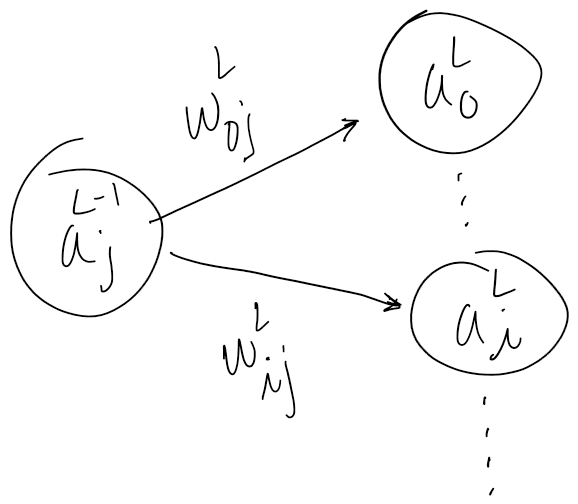</img>


From the diagram above we can see that:

$$ \frac{\partial J}{\partial a^{L-1}_{j}} = \sum_i \frac{\partial z^{L}_i}{\partial a^{L-1}_{j}} \frac{\partial a^{L}_i}{\partial z^{L}_i} \frac{\partial J}{\partial a^{L}_i} \tag{20} = \sum_i w^L_{ij}\delta^L_i$$

Which in vector form is:

$$ \frac{\partial J}{\partial a^{L-1}} = (w^L)^T\delta^L \tag{21}$$

Therefore (19) becomes:

$$ \delta^{L-1} = \sigma'(z^{L-1}) \odot ((w^L)^T\delta^L) \tag{22}$$

Which can be rewritten in a more general form as (b2):

$$ \delta^{l} = ((w^{l+1})^T\delta^{l+1}) \odot \sigma'(z^{l})\tag{b2}$$